# Day-4

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
path="/creditcard.csv"
df=pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

print(f"Fraud cases: {len(fraud)}")
print(f"Normal cases: {len(normal)}")
print(f"Fraud %: {len(fraud) / len(df) * 100:.5f}%")
print(f"Normal %: {len(normal) / len(df) * 100:.5f}%")

Fraud cases: 492
Normal cases: 284315
Fraud %: 0.17275%
Normal %: 99.82725%


In [39]:
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum().sum())
print("\nClass distribution:\n", df['Class'].value_counts(normalize=True) * 100)

Dataset shape: (284807, 31)

Missing values:
 0

Class distribution:
 Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score, roc_curve,
    log_loss, f1_score
)
from sklearn.metrics import roc_curve


In [41]:
# Store metrics for comparison
results = []

# Store ROC data for plots
roc_data = []

# Evaluation function
def evaluate_model(y_true, y_pred, y_proba,model, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    ll = log_loss(y_true, y_proba)
    cm = confusion_matrix(y_true, y_pred)

    # Store in results list
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC-AUC': roc_auc,
        'Log Loss': ll
    })

    # Store for combined ROC plot
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_data.append((model_name, fpr, tpr))

    # Print evaluation
    print(f"\n Evaluation for {model_name}")
    print(f"Accuracy   : {acc:.4f}")
    print(f"Precision  : {prec:.4f}")
    print(f"Recall     : {rec:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"ROC-AUC    : {roc_auc:.4f}")
    print(f"Log Loss   : {ll:.4f}")
    print("Confusion Matrix:")
    print(cm)

    #ROC Curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #Confusion Matrix Plot
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(8, 6))
        pd.Series(model.feature_importances_, index=X.columns).sort_values().plot.barh()
        plt.title(f'Feature Importance - {model_name}')
        plt.tight_layout()
        plt.show()



 Evaluation for Tuned Random Forest
Accuracy   : 0.9991
Precision  : 0.7059
Recall     : 0.8571
F1 Score   : 0.7742
ROC-AUC    : 0.9820
Log Loss   : 0.0139
Confusion Matrix:
[[56829    35]
 [   14    84]]


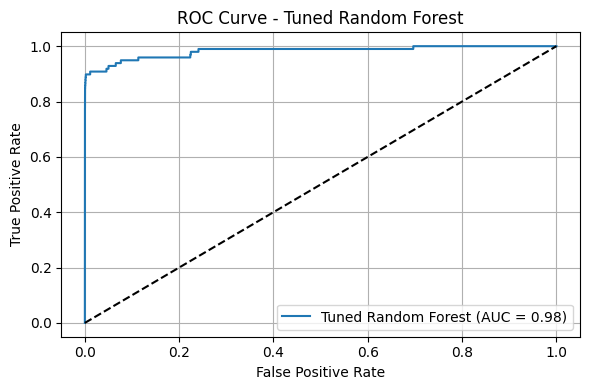

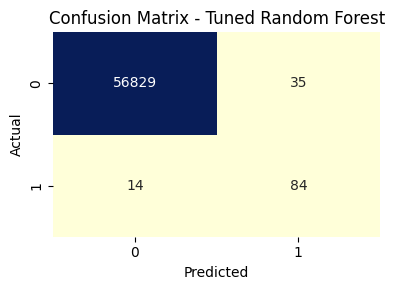

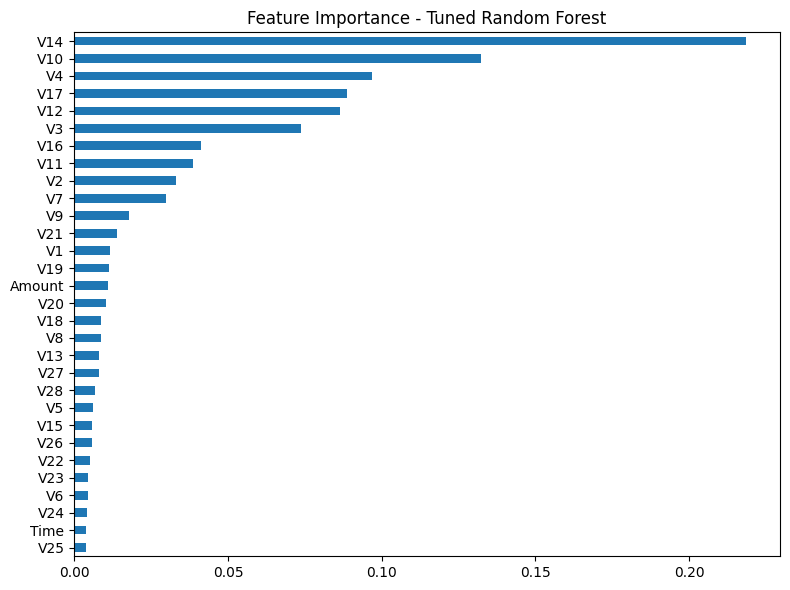

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Step 0: Split X and y
X = df.drop(columns='Class')
y = df['Class']

# Step 1: Train-test split (preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Subsample training data for faster tuning
X_tune, _, y_tune, _ = train_test_split(
    X_train, y_train,
    train_size=50000, stratify=y_train, random_state=42
)

# Step 4: Define hyperparameter grid for RandomizedSearchCV
param_dist_rf_recall = {
    'n_estimators': randint(50, 200),
    'max_depth': [10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Step 5: Initialize randomized search
random_rf_recall = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf_recall,
    n_iter=10,
    scoring='recall',
    cv=3,
    n_jobs=-1,
    random_state=42
)

# Step 6: Fit randomized search on tuning subset
random_rf_recall.fit(X_tune, y_tune)

# Step 7: Retrain best model on full training data
best_rf_recall = random_rf_recall.best_estimator_
best_rf_recall.fit(X_train, y_train)

# Step 8: Predict on test set
y_proba_rf = best_rf_recall.predict_proba(X_test)[:, 1]
y_pred_rf  = (y_proba_rf >= 0.4).astype(int)

# Step 9: Evaluate
evaluate_model(y_test, y_pred_rf, y_proba_rf, best_rf_recall, "Tuned Random Forest")


In [29]:
from google.colab import drive
import joblib
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define the path where to save the model (e.g., in a "models" folder inside Drive)
model_path = '/content/drive/My Drive/best_model.joblib'  # or '/content/drive/My Drive/your-folder/best_model.joblib'

# Save the model
joblib.dump(best_rf_recall, model_path)

print(f"Model saved to: {model_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to: /content/drive/My Drive/best_model.joblib
